## An Exercise in Optimization
<p>


This article presents different ways of optimizing a function. Optimization is not just coming up with neat tricks but also understanding how those tricks are affecting the function, understanding the results and ensuring correctness along the way. 
<p>General steps that anyone follows when they face a problem is first they try to understand what the problem is. Then try and design a solution, if its in programming then write a pseudo code then code, test and then debug. 
<p>In this exercise, the problem is the Taylor series, we already know the solution i.e., expression of different functions in the form of Taylor Series. What we will be focusing on is the optimization of these functions that calculate the value of different mathematical functions using taylor series. You will see how each optimization affects the performance and does it affect the accuracy which in other words is testing of the function. I will also try and visualize the data as much as possible to give a better understanding of what is going on.

Before we begin with the exercise lets brush up our knowledge of <b>Taylor Series

### Taylor Series
<p>A Taylor Series is an expansion of a function into an infinite sum of terms, with increasing exponents of a variable. Any continuous function can be expressed as Taylor Series. To know more about Taylor Series click 
    <a href='https://en.wikipedia.org/wiki/Taylor_series'>here</a>.
<p>In this exercise we will be looking at the following functions

#### The geometric series  $\frac{1}{(1-x)}$
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 

#### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 


#### The Trigonometric functions
$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

***

### Testing function
Here is a function for checking correctness. Anytime we make a change in our functions we will call this testing function to check whether its correct.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [163]:
#Testcases for different functions
testcase_gs = np.linspace(0.1, 1, num = 9, endpoint = False)
testcase_exp = np.linspace(20, 70, num = 50, endpoint = False)
testcase_trig = np.linspace(0, 2*np.pi, num = 100, endpoint = False)

#Testing Function
def test(func1, func2, testcase) :
    
    if func1.__name__ == "cal_sine_cosine" :
        if func2.__name__ == "cos" :
            c = 0
        else:
            c = 1
        ourvalues = []
        actualvalues = []
        error = []
        for i in testcase :
            o = round(func1(i,c)[0],7)
            a = round(func2(i),7)
            ourvalues.append(o)
            actualvalues.append(a)
            error.append(a-o)
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(ourvalues, color = 'red')
        ax[0][0].set_title(func1.__name__ + "()")
        ax[0][1].plot(actualvalues)
        ax[0][1].set_title(func2.__name__+"()")
        ax[1][0].plot(ourvalues,color = 'red')
        ax[1][0].plot(actualvalues)
        ax[1][0].legend([func1.__name__ + "()", func2.__name__+"()"])
        ax[1][0].set_title("Superimposition of "+func1.__name__ + "()" +" and "+ func2.__name__+"()")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
        
    else :
        ourvalues = []
        actualvalues = []
        error = []
        failed= []
        for i in testcase :
            o = (func1(i)[0])
            a = (func2(i))
            ourvalues.append(o)
            actualvalues.append(a)
            e = ((a-o)/a)*100
            error.append(e)
            if e > 0.01 :
                failed.append(i);
            
        fig, ax = plt.subplots(1,3,figsize=(20,5))
        
        ax[0].plot(testcase, ourvalues, color = 'red')
        ax[0].set_title(func1.__name__ + "()")
        ax[0].set_xlabel("testcases")
        
        ax[1].plot(testcase, actualvalues)
        ax[1].set_title(func2.__name__+"()")
        ax[1].set_xlabel("testcases")

#         ax[1][0].plot(ourvalues,color = 'red')
#         ax[1][0].plot(actualvalues)
#         ax[1][0].legend([func1.__name__ + "()", func2.__name__+"()"])

        ax[2].set_title("Superimposition of "+func1.__name__ + "()" +" and "+ func2.__name__+"()")
        ax[2].plot(testcase, error)
        ax[2].set_title("error")
        avg_error = sum(error)/len(error)

        if(avg_error < 0.01) :
            fig.suptitle("All test cases passed", fontsize = 15)
            ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n < 0.01%",
                       size=12, ha="center", transform=ax[2].transAxes)
# Function that will calculate sum of geometric progression for |x|<1
def gp(x) :
    return (1/(1-x))

***


### The geometric series 
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 
<br>This holds true when $|x| < 1$

Since the value of $|x| < 1$ and the power goes on increasing, the series converges. This means that the end terms approximate to zero. The graph below is for $0.7$ from its $0^{th}$ to $20^{th}$ power. Look at how the term is converging as the power is increasing.

Naive -Iteration - power 

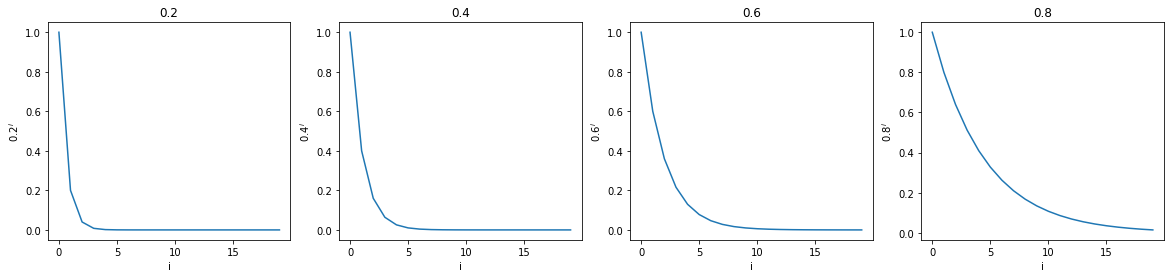

In [139]:
axp = [0.2, 0.4, 0.6, 0.8]
l = []
exl = []
for x in axp :
    sl = []
    esl = []
    for i in range(0,20) :
        sl.append(math.pow(x,i))
    l.append(sl)

fig, ax = plt.subplots(1, len(l), figsize = (20, 4))
for i in range(0, len(l)) :
   # print(";ldfv == " , l[i])
    ax[i].plot(l[i]);
    ax[i].set_title(axp[i]);
    ax[i].set_ylabel(str(axp[i])+'$^i$');
    ax[i].set_xlabel('i');

Taylor Series is an infinite series but we can't run our loop forever, so we can keep the terminating condition such that we stop when we arrive at a term which equals zero. This is the naive implementation.

In [12]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + pow(a,i)
        i = i + 1
        b = pow(a,i)
gpsum(0.5)

702 µs ± 345 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Python provides another way to find the power of a given number

In [13]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + a**i
        i = i + 1
        b = pow(a,i)
gpsum(0.5)

451 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


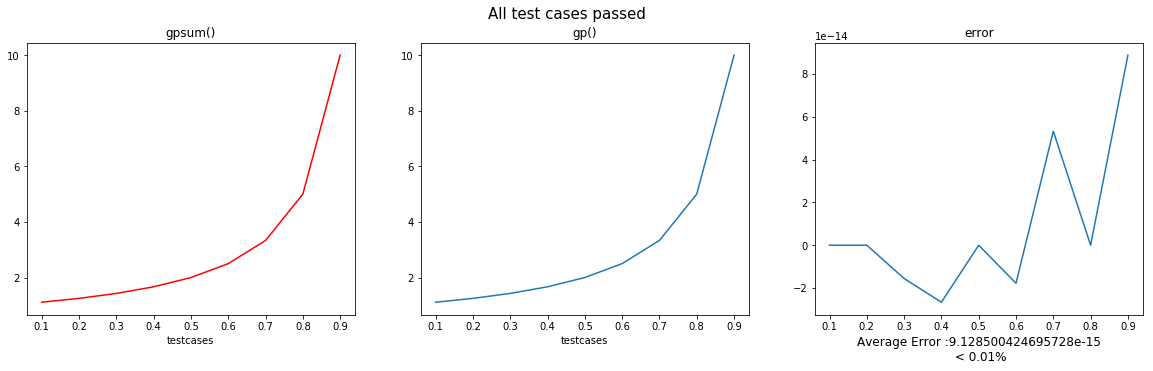

In [158]:
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
        s = s + a**i
        i = i + 1
        b = pow(a,i)
    return s, i 

test(gpsum,gp,testcase_gs)

#### 1] Set a precision limit to reduce the number of iterations

There are 53 bits of precision available for python float, due to which the calculations continue till the $53^{rd}$ bit. In this particular case I'm choosing my error to be bound by 0.01%, this will help me determine what should be my precision limit to attain 99.99% accuracy.

In [129]:
def gp_prec_tol(x, tole) :
    s = 0
    count = 0
    t = 1 
    while t > tole :
        t = x**count
        s = s + t
        count += 1
    return s, count


3.3333333333333335e+18

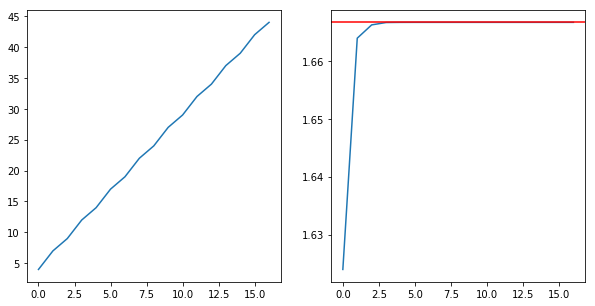

In [120]:
iterations = []
ans_tol = []
ans = []
for i in tolerance_list :
    tup = gp_prec_tol(0.4, i)
    iterations.append(tup[1])
    ans_tol.append(tup[0])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot( iterations);
ax[1].plot( ans_tol);
# ax[1].plot( );
ax[1].axhline(y = gp(0.4), color = 'red');

In [102]:
%%timeit
def pow_sum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.00001 :
        t = a**count
        s = s + t
        count += 1
    return s

pow_sum_limit(0.5)

9.89 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### This change simply made it $120\times$ faster ! 

In [103]:
def pow_sum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.00001 :
        t = a**count
        s = s + t
        count += 1
    return s, count

Below is a function that will plot the number of iterations taken by the two functions and also plot another graph with that value of the sum along with respective value of $\frac {1}{1-x}$

In [104]:
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def compare_functions(func1,func2):
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])
        ans1.append(tup1[0])
        ans2.append(tup2[0])
        actual.append(1/(1-i))    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].plot(a,itr1, color = 'red')
    ax[0].plot(a,itr2)
    ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
    ax[0].set_title("Iterations")
    ax[0].set_ylabel("No.of Iterations")
    ax[0].set_xlabel("$x$")
    ax[1].plot(a, ans1, color = 'red')
    ax[1].plot(a, ans2)
    ax[1].plot(a, actual)
    ax[1].legend([func1.__name__+"()",func2.__name__+"()","${1}/{(1-x)}$"])
    ax[1].set_title("Values of geometric series")

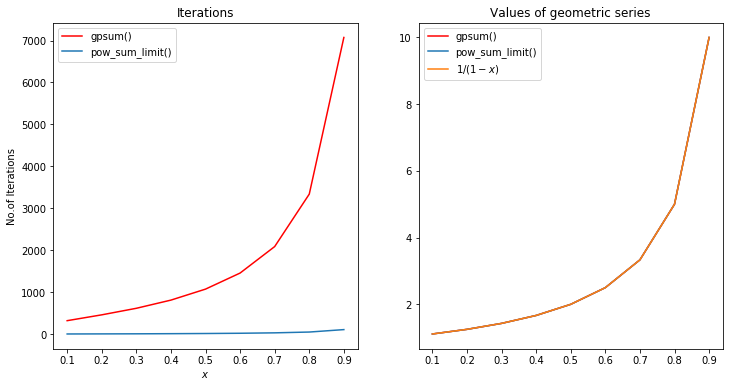

In [105]:
compare_functions(gpsum,pow_sum_limit)

In [106]:
print(gpsum(0.9))
print(pow_sum_limit(0.9))

(9.999999999999993, 7073)
(9.999916647515818, 111)


We can see that for $0.9$, the naive implementation takes near about 7000 iterations whereas when we set a limit the number of iterations do not even reach 1000. The second graph shows the actual values calculated by both of the functions and the value of $\frac {1}{1-x}$, the three of them superimpose, which says that the two functions are quite accurate but by simply setting a limit we can reduce the number of iterations by 7000 and get a speedup of $120\times $.


<p>Lets optimize it further.
<p>In the above functions we are calculating $a^i$ at every iteration. We don't need to do that, since at one iteration we've calculated the value of $a^i$ at the next iteration we can just multiply that value by $a$. It would go something like this 
<br>$a$
<br>$(a)\cdot a$
<br>$(a\cdot a)\cdot a$
<br>$(a\cdot a\cdot a)\cdot a$
<br>$\dots$


<p>Second case of optimization

    
#### 2] Replacing the pow()  or ** function.

In [107]:
%%timeit
def pow_sum_limit1(a):
    s = 0
    t = 1
    while t > 1e-5 :
        t = t*a
        s += t
    return s
pow_sum_limit(0.5)

11.8 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### We get a speed up of $300\times$

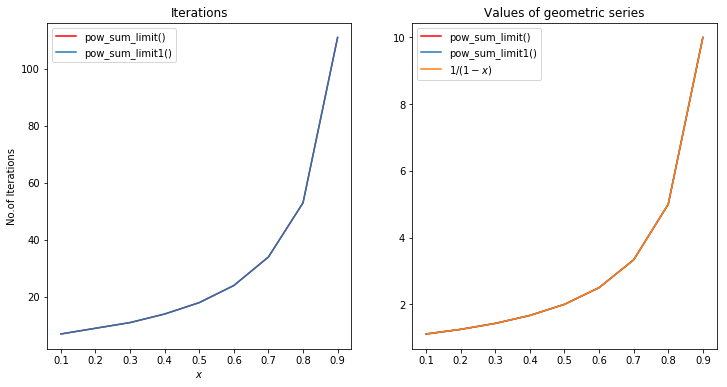

In [108]:
def pow_sum_limit1(a):
    s = 1
    t = 1
    count = 1 
    while t > 0.00001 :
        t = t*a
        s = s + t
        count += 1
    return s, count

compare_functions(pow_sum_limit,pow_sum_limit1)

We see that there is a slight difference in the number of iterations taken by our recent functions, that is because we enter the loop with value of $s$ initialized to 1 rather than 0, which saves our 1 iteration.


To summarize what we did in the geometric series
<ul>
    <li>We started off with a naive implementation where is go on iterating till we find a term that is equal to $0$.</li> 
    <li>To avoid those extra iterations we set a precision limit to our loop which gave us a speed up of <b>120x</b></li>
    <li>Then instead of calculating the exponential term for every iteration, we used the value produced in our previous       iteration and multiplied it with 'a'. Which gave us a speedup of <b>300x</b>.</li>
    </ul>

***

Till now we have seen two ways to optimize our function that calculates the sum of the geometric series. We will move on to the exponential function and perform similar optimization.

***

### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 

Looking at the series we observe that there is factorial in every term which was not present in the geometric series. Python provides a math.factorial(x) function that calculates the factorial of x. Can we replace it the same way we replaced the pow() function in our geometrix series ? 
<p> We also wrote a testing function for geometric series in which we compare the no.of iterations and also cross the sum of the series with $\frac {1}{1-x}$. Similarly we need to write a testing function for our exponential function and trigonometric functions.
    <br>Therefore we need to write a <b>generic testing funcition</b> that can test our functions for accuracy. We want to optimize our functions but also keep the correctness of it.
<p>Lets list down the tasks we need to perform for this function.
<ul>
    <li> Set a terminating condition such that you can avoid unnecessary iterations. </li>
    <li> Replace the power function, math.pow(). </li>
    <li> Find a way to replace math.fact() in a similar way we did for pow().</li>
    <li> Put all of these together and see what resut you get.
</ul>

***

***

#### Optimizing the Exponential function

#### 1] Finding the terminating condition
<p>Lets plot a graph and see how series looks like for $e^2$.

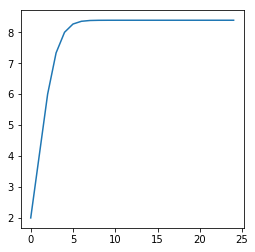

In [109]:
e = 1 
i = 0
l = []
while i < 25 :
    e += 2**i/math.factorial(i)
    i = i + 1
    l.append(e)
    
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(l);

We observe that after a certain no.of iterations the value of sum does not change, so lets keep this as our terminating condition.

In [110]:
 %%timeit
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow(5)

66.9 µs ± 3.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Testing our function for correctness 

In [115]:
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

As discussed earlier, python's floating point has 52 bit precision. We will set a precision limit to reduce the number of iterations.

In [116]:
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    i  = 0 
    while t1 > 1e-5:
        t1 = x**i/math.factorial(i)
        e_to_2 += t1
        i = i + 1
    return e_to_2, i


In [117]:
%%timeit
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    i  = 0 
    while t1 > 1e-5:
        t1 = x**i/math.factorial(i)
        e_to_2 += t1
        i = i + 1
    return e_to_2, i

e_pow1(5)

32.9 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


####  We get a speed up of 2x by setting a precision limit.

Precision limit affects the number of iterations, lets compare it with our naive approach.
<br>Since we would be checking no.of iterations quite often lets make a generic function to compare no.of iterations of two functions.

In [118]:
def compare_iter(func1, func2) : 
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])  
      # ax.plot([i, i], [tup1[1], tup2[1]], color='grey', ls='dotted')
      # ax.text(i, (tup1[1]+tup2[1])/2, tup1[1]-tup2[1], color='orange')
        ax.text(i, tup1[1]-0.6, tup1[1], color = 'red')
        ax.text(i, tup2[1]+0.4, tup2[1], color = 'purple')
    
    ax.plot(a,itr1, color = 'red')
    ax.plot(a,itr2)
    ax.legend([func1.__name__+"()", func2.__name__+"()"])
    ax.set_title("Iterations")
    ax.set_ylabel("No.of Iterations")
    ax.set_xlabel("$x$")
    

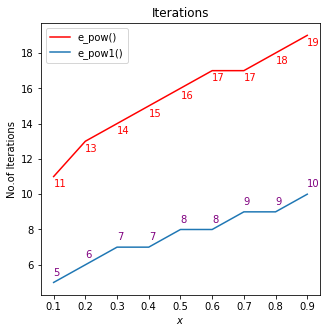

In [119]:
compare_iter(e_pow,e_pow1)

#### We can see that the no.of iterations are reduced to half.

We've completed our first task in the exponential functions lets move on to the next task that is replacing the pow() function. 
<p> Note that are not optimizing the function step by step, that is we won't be optimizing the pow() function in the reduced iterations function, instead we will make changes in our naive approach and see the changes. We will be doing this with our further tasks as well. In the end we will put all of these together and see what is our result.

***

#### 2] Replacing pow() 

In [ ]:
def e_pow2(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        term *= x
        t1 = term/math.factorial(i)
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2, i

testcase = np.linspace(20, 70,num = 50,endpoint=False)
test(e_pow2,math.exp,testcase)

In [ ]:
%%timeit
def e_pow2(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        term *= x
        t1 = term/math.factorial(i)
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow2(5)

#### We get a speedup of 1.5x as compared to our naive implementation 

***


#### 3] Replacing factorial 

Factorial of any given number $n!$  is given as 
<br>
$n! = (n) \cdot (n-1) \cdot (n-2) \dots 2 \cdot 1$
<br>In our function as we go on iterating, we are incrementing the value of $i$ by $1$ and at every iteration we are finding the value of math.factorial(i). Instead we can store the initial value of $i$ and $1$ and go on multiplying that value at every iteration.

<br>$Iteration - 1 \space \space i = 1 \space \space fact = 1$<br><br>$Iteration - 2 \space \space i = 2 \space \space fact = 1\cdot i$<br><br>$Iteration - 3 \space \space i = 3 \space \space fact = 1\cdot 2 \cdot i$<br><br>$\dots$<br>
<br>

In [ ]:
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        fact *= i
        t1 = x**i / fact
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

test(e_pow3,math.exp)

In [ ]:
%%timeit 
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        fact *= i
        t1 = x**i / fact
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow2(5)

#### We get a speed up of 1.5x by changing the math.factorial() in our naive implementation

***

#### 4] Putting 3 optimizations together

We will now put our previously made optimizations together into our naive implementation, check the speed up and the number of iterations.

In [ ]:
%%timeit
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t1 = float(t1)
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 1e-5:
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow3(5)

In [ ]:
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t1 = float(t1)
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 1e-5:
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2, i + 1


In [ ]:
compare_iter(e_pow, e_pow3)

#### We get a speed up of 5x by putting all three of the ideas together. 
Precision limit alone determine the no.of iterations taking place to calculate a value. That alone gives us a speed up of 1.9x as seen previously.

***

#### Can we optimize it further ?

What we are doing here is we are using the previously calculated exponential value multiplying it by $x$ to find the $x^k$ and similarly for factorial $k!$, our iterator is $i$, therefore we multiply our previously calculated factorial value with $i$ to get $i!$. 
<br>
<br>At every iteration we are calculating $\frac{a\cdot a\cdot a ...}{1\cdot2\cdot3...}$
<br>As the no.of iterations increase the numerator and denominator go on increasing in magnitude, we then divide these two large numbers which is relatively another big calculation. 
<br>
<br>Instead of calculating two big terms we can calculate <br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})\cdot\frac{k}{i+1}$<br><br>$(\frac{k}{i}\cdot\frac{k}{i+1})\cdot\frac{k}{i+2}$<br><br>$\dots$<br>
<br>In all of our previous approach we had initialised the value of exponential sum to zero. Since, we wont be calculating the factorial and exponential terms separately, we need to initialise the sum to 1 

In [ ]:
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2, i + 1

gen_test(e_pow4,math.exp)

In [ ]:
%%timeit
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow4(5)

### We get a speed up of 10x !

In our previous function <b>e_pow3()</b> we got a speed up of <b>5x</b> and after making a <b>change in the way we were calculating each of our terms</b> in the series we get a speed up of <b>10x</b>. 
<br>Instead of finding out exponent and factorial separately and then dividing the two to find the term at every iteration we applied the same logic in which we use the previously found term and multiply it with the right factor.

***


Now we have one more optimization method that we used in our exponential function, which could be of use in the trigonometric series. Lets find out!

***

### The Trigonometric Functions 
<br>

Before we proceed here is a testing function for the sine, cosine functions that we will be writing 

In [ ]:
# list of angles from 0 - 2pi
angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
def testing1(func,i) :
    if i == 0 :
        cosx = []
        actualcos = []
        error = []
        
        #finding cos from userdefined function and math.cos, calculating error for all angles in the list
        for i in angle :
            cosofx = func(i)
            actualcosofx = math.cos(i)
            cosx.append(cosofx)
            actualcos.append(actualcosofx)
            error.append(round((actualcosofx - cosofx),10))
            
        #plotting graph of userdefined and math.cos values 
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(cosx, color = 'red')
        ax[0][0].set_title("cosine(x)")
        ax[0][1].plot(actualcos)
        ax[0][1].set_title("math.cos(x)")
        ax[1][0].plot(cosx, color = 'red')
        ax[1][0].plot(actualcos)
        ax[1][0].legend(['cosine(x)', 'math.cos(x)'])
        ax[1][0].set_title("Superimposition of cosine(x) and math.cos(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
    if i == 1 :
        sinx = []
        actualsin = []
        error = []
        
        #finding cos from userdefined function and math.cos, calculating error for all angles in the list
        for i in angle :
            sinofx = func(i)
            actualsinofx = math.sin(i)
            sinx.append(sinofx)
            actualsin.append(actualsinofx)
            error.append(round((actualsinofx - sinofx),10))
            
        #plotting graph of userdefined and math.cos values 
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(sinx, color = 'red')
        ax[0][0].set_title("sin(x)")
        ax[0][1].plot(actualsin)
        ax[0][1].set_title("math.sin(x)")
        ax[1][0].plot(sinx, color = 'red')
        ax[1][0].plot(actualsin)
        ax[1][0].legend(['sin(x)', 'math.sin(x)'])
        ax[1][0].set_title("Superimposition of sin(x) and math.sin(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

#### The Cosine Function
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$


In [ ]:
def cosine(x):
    cosx = 1
    t1 = 1
    sign = -1
    i = 2
    while True:
        cosx = cosx + (sign*(x**i))/math.factorial(i)
        sign = -sign
        i = i + 2
        if t1 == cosx :
            break
        t1 = cosx
    return cosx

In [ ]:
print(round(cosine(1.04),2)) # 60degeree

In [ ]:
testing1(cosine,0)

Similarly we can write a naive implementation for finding $\sin x$


$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$

In [ ]:
def sin(x):
    t1 = i =sine = 0
    sign = -1
    while True:
        sign = -sign
        sine = sine + ((x**(2.0*i+1))/math.factorial(2*i+1))*sign
        i = i + 1
        if t1 == sine : 
            break
        t1 = sine
    return sine
print(sin(0.52))

In [ ]:
testing1(sin,1)

The cosine expansion consists of even powers whereas the sine expansion consists of the odd powers, we try to make a single function which can calculate both sine and cosine function
### Here is a function that calculates both sine and cosine 
We pass the indicator i = 0 for cosine and i = 1 for sine

In [ ]:
%%timeit
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    while True:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine(np.pi/3,1)

In [ ]:
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    n = 0
    while True:
        n = n + 1
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

'''
As we move further in the series the power increases and the series converges, after a certain number of iterations the 
value of sum i.e, val does not change. For this reason we have the terminating conndition --- t1 == val 
'''

#### You can use this function to find values of $cos x$ and $sin x$ in the following way

In [ ]:
def find_cos(x) :
    cal_sine_cosine(x,0)
    
def find_sin(x) :
    cal_sine_cosine(x,1)

Here is a testing function, where in you can check how correctly does your function calculate the values 
<br>As we would be performing optimizations on our functions we need to keep checking if the values calculated are correct values.

In [ ]:
angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
def testing2(func,i) :
    if i == 0 :
        cosx = []
        actualcos = []
        error = []
        
        #finding cos and math.cos for every angle in the list
        for i in angle :
            cosofx = func(i,0)[0]
            actualcosofx = math.cos(i)
            cosx.append(cosofx)
            actualcos.append(actualcosofx)
            error.append(round((actualcosofx - cosofx),7))
            
        #plotting graph for userdefines and math.cos
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(cosx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,0)")
        ax[0][1].plot(actualcos)
        ax[0][1].set_title("math.cos(x)")
        ax[1][0].plot(cosx, color = 'red')
        ax[1][0].plot(actualcos)
        ax[1][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,0) and math.cos(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
        
    if i == 1 :
        sinx = []
        actualsin = []
        error = []
        
        #finding sin and math.sin for all values in list - angle
        for i in angle :
            sinofx = func(i,1)[0]
            actualsinofx = math.sin(i)
            sinx.append(sinofx)
            actualsin.append(actualsinofx)
            error.append(round((actualsinofx - sinofx),7))
            
        #plotting graph for user defined function and math.sin
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(sinx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,1)")
        ax[0][1].plot(actualsin)
        ax[0][1].set_title("math.sin(x)")
        ax[1][0].plot(sinx, color = 'red')
        ax[1][0].plot(actualsin)
        ax[1][0].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,1) and math.sin(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

In [ ]:
test(cal_sine_cosine,math.sin,testcase_trig)

In [ ]:
test(cal_sine_cosine,math.cos,testcase_trig)

<br>
Instead of using (x**i), we find the power and factorial in an efficient way and see its computing time

In [ ]:
%%timeit
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine1(np.pi/3,1)

Computation time has decreased from around 11$\mu s$ tp 7$\mu s$
<br>Lets see how accurate this function is 

In [ ]:
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        n = n + 1
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

In [ ]:
testing2(cal_sine_cosine1,0)

In [ ]:
testing2(cal_sine_cosine1,1)

#### We can set a precision limit to reduce the no.of iterations 

In [ ]:
%%timeit
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    t1 = 1
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while abs(t1) >= 1e-5:
        term = term*sq
        fact = fact*i*(i-1)*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
        
    return val

cal_sine_cosine2(np.pi/6,1)

#### There is significant reduction in the computation time from 12.5 µs ± 103 ns per loop to 3$\mu s$

In [ ]:
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = 1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        term = term*sq
        fact = fact*(i*(i-1))*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
    return val, n

In [ ]:
testing2(cal_sine_cosine2,0)

In [ ]:
testing2(cal_sine_cosine2,1)


<br> We will now replace $\frac{a.a.a...}{1.2.3...}$ by 
<br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})*\frac{k}{i+1}*\frac{k}{i+2}$<br><br>$(\frac{k}{i}*\frac{k}{i+1}*\frac{k}{i+2})*\frac{k}{i+3}*\frac{k}{i+4}$<br><br>$\dots$<br>

In [ ]:
%%timeit
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
    return val

cal_sine_cosine3(np.pi/6,1)

In [ ]:
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    con_val = []
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
        n = n + 1
        con_val.append(val)
    return val, n, con_val

In [ ]:
testing2(cal_sine_cosine3,1)

In [ ]:
testing2(cal_sine_cosine3,0)

In [ ]:
x = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
cosx = []
actualcosx = []
cosx_itr = []
sinx = []
actualsinx = []
sinx_itr = []
for i in x :
    tup = cal_sine_cosine3(i,0)
    cosx.append(tup[0])
    cosx_itr.append(tup[1])
    actualcosx.append(math.cos(i))
    tup = cal_sine_cosine3(i,1)
    sinx.append(tup[0])
    sinx_itr.append(tup[1])
    actualsinx.append(math.sin(i))  

We calculated cos(x), sin(x), math.cos(x), math.sin(x), the number of iterations required to calculate each of these values by function cal_sine_cosine(x,i). Lets take a look at visual representation of these values

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10)) 
ax[0][0].plot(cosx, color ='red')
ax[0][0].plot(actualcosx)
ax[0][0].set_title("cos(x)")
ax[0][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
ax[0][1].plot(sinx, color = 'red')
ax[0][1].plot(actualsinx)
ax[0][1].set_title("sin(x)")
ax[0][1].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
ax[1][0].plot(cosx_itr)
ax[1][1].plot(sinx_itr)

We can see that as the angles approaches 2pi the number of iterations increase. 
<br>Let us consider one of the lasts terms in our list of angles. At each iteration we will store the value of sum that is the value of cos(x) / sin(x) and plot it, then check these values for errors. 

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
tup = cal_sine_cosine3(x[97],0)
ax.plot(tup[2])
ans = math.cos(x[97])
error = []
for i in tup[2] : 
    error.append(ans - i)
ax.plot(error, color = 'red')
ax.legend(['cal_sine_cosine('+str(round(x[97],3))+',0)', 'error'])
ax.set_xlabel("No.of Iterations")
ax.set_ylabel("Value")

***

Till now we have seen 4 functions that calculate sine and cosine values. Using %%timeit we also found out the computation time required by these functions. 
<br>Now lets take a look at the number of iterations.

In [ ]:
itr = []
itr1 = []
itr2 = []
itr3 = []
for i in x :
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine1(i,0)[1])
    itr2.append(cal_sine_cosine2(i,0)[1])
    itr3.append(cal_sine_cosine3(i,0)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr,color = 'red')
ax[0].plot(itr1, color = 'blue')
ax[0].plot(itr2,color = 'yellow')
ax[0].plot(itr3, color  = 'green')
ax[0].legend(['cal_sine_cosine(x)','cal_sine_cosine1(x)','cal_sine_cosine2(x)','cal_sine_cosine3(x)'])
ax[0].set_ylabel("Iterations")

itr4 = []
itr4.append(cal_sine_cosine(0,0)[1])
itr4.append(cal_sine_cosine1(0,0)[1])
itr4.append(cal_sine_cosine2(0,0)[1])
itr4.append(cal_sine_cosine3(0,0)[1])
xaxis = ["cal_sine_cosine(0,0)","cal_sine_cosine1(0,0)","cal_sine_cosine2(0,0)","cal_sine_cosine3(0,0)"]
ax[1].plot(xaxis,itr4)
ax[1].set_title("No.of Iterations when x  = 0")
ax[1].set_xlabel("cal_sine_cosine(x) functions [Naive --> Optimized]")
ax[1].set_ylabel("Iterations")

The number of iterations have decreased with increased optimization. 
<br>The last two functions have the same no.of iterations that is why you can't see yellow - they overlap
<br>In the second graph at the right, we can see the number of iterations taken by each function to find cos(0)
<br>What if we set a precision limit to our very first naive implementation of calculating sine and cosine, how will the graph for number of iterations look?

In [ ]:
def cal_sine_cosine4(x,i) :
    t1 = 1
    val = 0
    sign = -1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        sign  = -sign
        t1 = ((x**(i))/math.factorial(i))*sign
        val = val + t1
        i = i + 2
    return val, n

In [ ]:
itr4 = []
itr41 = []
itr = []
itr1 = []
angle = np.linspace(0, 2* np.pi  ,num = 101 , endpoint=True)
for i in angle :
    itr4.append(cal_sine_cosine4(i,0)[1])
    itr41.append(cal_sine_cosine4(i,1)[1])
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine(i,1)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr4)
ax[0].plot(itr, color = 'orange')
ax[0].set_ylabel("Iterations for finding cos")
ax[0].legend(['cal_sine_cosine4(x,0)','cal_sine_cosine(x,0)'])
ax[1].plot(itr41)
ax[1].plot(itr1, color = 'orange')
ax[1].set_ylabel("Iterations for finding sine")
ax[1].legend(['cal_sine_cosine4(x,1)','cal_sine_cosine(x,1)'])

The number of iterations are quite lower than the first naive implementation. The computation time required can significantly be reduced by just keeping a proper terminating condition, further optimization can be done to get an even smaller computation time.

***